# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [3]:
# train 데이터 불러오기
df = pd.read_csv("//Users/jugjug/Desktop/graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [4]:
# test 데이터 불러오기
test = pd.read_csv("/Users/jugjug/Desktop/graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [5]:
## TODO
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치가 없었지만, 만약 있었다면 지원에 대한 기준이 충족되지 않았다고 판단하고 해당 행을 제거했을 것 같습니다

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [6]:
## TODO
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

In [7]:
df['Research'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df.replace({'Research':['No','Yes']},{'Research':[0,1]},inplace=True)

In [9]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,0.71
1,307,105,2,2.5,4.5,8.12,1,0.67
2,329,111,4,4.5,4.0,9.01,1,0.81
3,300,105,1,1.0,2.0,7.80,0,0.58
4,329,114,5,4.0,5.0,9.30,1,0.86
...,...,...,...,...,...,...,...,...
395,316,110,3,3.5,4.0,8.56,0,0.75
396,302,110,3,4.0,4.5,8.50,0,0.65
397,312,107,4,4.5,4.0,8.65,1,0.73
398,298,99,1,1.5,3.0,7.46,0,0.53


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research라는 Column이 수정을 거쳐서 범주형 데이터로 나타낼 수 있었고, University Rating이 범주형 데이터로 보였다.
Research는 No와 Yes를 0과 1로 바꾸었다

# 3. 선형(Linear) 회귀

In [10]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [11]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [12]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 7)
training response size: (320,)
test predictors size: (80, 7)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
linear = LinearRegression()
# 2. 모델을 적합시킵니다.
## TODO
linear.fit(X_train,y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print(linear.score(X_train,y_train))

0.825983502644189


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = linear.predict(X_test)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [17]:
## TODO

linear.intercept_

-1.2551828664076377

Q. 절편 계수의 의미는 무엇인가요?  
A. 회귀로 나온 선의 B0를 의미한다

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [18]:
## TODO
linear.coef_

array([0.00164004, 0.00360629, 0.00274832, 0.00725297, 0.01734313,
       0.11207947, 0.02648145])

Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 각 변수의 영향력을 의미하고, CGPA가 대학원 합격에 가장 큰 영향을 미친다는 것을 알 수 있다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

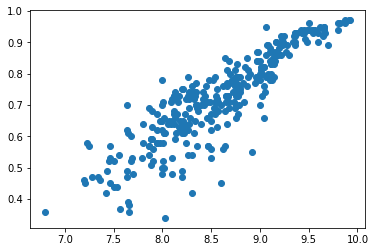

In [19]:
## TODO
plt.scatter(X_train['CGPA'],y_train)

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<module 'seaborn.categorical' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py'>

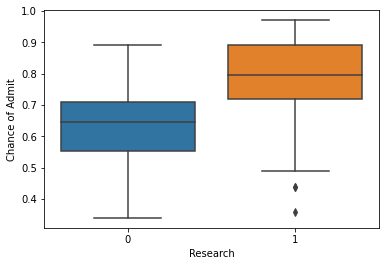

In [20]:
## TODO
sns.boxplot(X_train['Research'],y_train)
sns.categorical

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

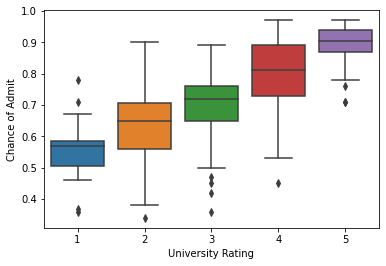

In [21]:
sns.boxplot(X_train['University Rating'],y_train)

### 3.2. StatsModels로 선형 회귀 시행하기

In [22]:
import statsmodels.api as sm

In [23]:
## TODO
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              5233.
Date:                Sat, 22 Jan 2022   Prob (F-statistic):                   4.95e-320
Time:                        23:54:54   Log-Likelihood:                          408.55
No. Observations:                 320   AIC:                                     -803.1
Df Residuals:                     313   BIC:                                     -776.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0031      0.000     -7.047      0.000      -0.004      -0.002
TOEFL Score           0.0040      0.001      3.121      0.002       0.001       0.007
University Rating     0.0138      0.005      2.666      0.008       0.004       0.024
SOP                   0.0157      0.006      2.468      0.014       0.003       0.028
LOR                   0.0156      0.006      2.689      0.008       0.004       0.027
CGPA                  0.1282      0.014      9.414      0.000       0.101       0.155
Research              0.0566      0.009      6.475      0.000       0.039       0.074
==============================================================================
Omnibus:                       52.807   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.143
Skew:                          -0.993   Prob(JB):                     1.46e-18
Kurtosis:                       4.490   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R squared와 F값이 매우 높게 나타나는 것으로보아, overfitting이 되었을 가능성이 있다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. University raiting이 미치는 영향은 적어보인다, GRE Score, CGPA가 영향이 커 보인다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [24]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import cross_val_score
# 1. 먼저 모델을 만들어 줍니다.
## TODO
alphas = [0.0001,0.001,0.01,0.1,1,10]
ridge = RidgeCV(alphas = alphas)
# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train,y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO

print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))


0.825912511295915
0.7711128104803038


In [25]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
alphas = [0.0001,0.001,0.01,0.1,1,10]
lasso = LassoCV(alphas = alphas)

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train,y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO

print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.8259767740591633
0.7727231323492606


In [27]:
#합격컬럼 만들기 -> ridge regression 선택 
test.replace({'Research':['No','Yes']},{'Research':[0,1]},inplace=True)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,0
1,297,96,2,2.5,1.5,7.89,0
2,302,101,2,2.5,3.5,7.96,0
3,318,112,3,4.0,3.5,8.67,0
4,304,100,4,1.5,2.5,7.84,0


In [31]:
y_submit = ridge.predict(test)
test['Chance of Admit'] = y_submit
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,304,103,5,5.0,4.0,8.64,0,0.702047
1,297,96,2,2.5,1.5,7.89,0,0.510654
2,302,101,2,2.5,3.5,7.96,0,0.580916
3,318,112,3,4.0,3.5,8.67,0,0.740627
4,304,100,4,1.5,2.5,7.84,0,0.548485


In [32]:
test.to_csv('/Users/jugjug/Desktop/graduate_submission.csv')